In [2]:
from model import Vanilla_SNN_Encoder_STIM_SPLIT, E2E_Encoder, E2E_Decoder, Vanilla_SNN_Encoder_STIM, Vanilla_SNN_Encoder, Vanilla_SNN_Decoder
import torch
from snntorch import surrogate
import local_datasets
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

In [3]:
cfg = {
    'flip_vertical': False,
    'flip_horizontal': False,
    'data_directory': "/Users/maximilianharl/Dropbox/001_university/008_ETH_UZH/003.Semester/IDB402/lab/REPOS/trial_2/viseon/_Datasets/",
    'subset': 500,
    'batch_size': 4
}

In [4]:
trainset, valset = local_datasets.get_mnist_dataset(cfg)
trainloader = DataLoader(trainset, batch_size=cfg['batch_size'],shuffle=True, drop_last=True)
valloader = DataLoader(valset,batch_size=cfg['batch_size'],shuffle=False, drop_last=True)
images, labels = next(iter(trainloader))

(1, 128, 128)


TypeError: Invalid shape (1, 128, 128) for image data

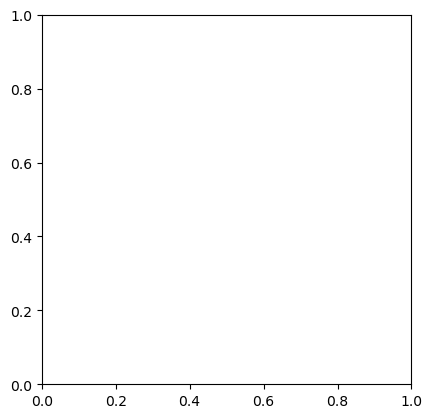

In [8]:
spike_grad = surrogate.atan(alpha=2.0)
in_channels=1
n_electrodes=1000
out_scaling=128.0e-6
out_activation='relu'
out_channels = 1

"""
model = Vanilla_SNN_Encoder_STIM_SPLIT(spike_grad=spike_grad,
                                       in_channels=in_channels,
                                       n_electrodes=n_electrodes,
                                       out_scaling=out_scaling,
                                       out_activation=out_activation)
"""
"""
encoder = E2E_Encoder(in_channels=in_channels,
                          n_electrodes=n_electrodes,
                          out_scaling=out_scaling,
                          out_activation=out_activation)

decoder = E2E_Decoder(out_channels=out_channels,
                          out_activation=out_activation)
"""

encoder = Vanilla_SNN_Encoder_STIM(spike_grad=spike_grad,
                               in_channels=in_channels,
                          n_electrodes=n_electrodes,
                          out_scaling=out_scaling,
                          out_activation=out_activation)

decoder = E2E_Decoder(in_channels=in_channels,
                                 out_channels=out_channels,
                               out_activation=out_activation)

"""
encoder = Vanilla_SNN_Encoder(spike_grad=spike_grad,
                           in_channels=in_channels,
                           n_electrodes=n_electrodes,
                           out_scaling=out_scaling,
                           out_activation=out_activation)

decoder = Vanilla_SNN_Decoder(spike_grad=spike_grad,
                             in_channels=in_channels,
                             out_channels=out_channels,
                           n_electrodes=n_electrodes,
                           out_scaling=out_scaling,
                           out_activation=out_activation)
"""
 
# Load the saved state dictionary
state_dict_encoder = torch.load('/Users/maximilianharl/Dropbox/001_university/008_ETH_UZH/003.Semester/IDB402/lab/REPOS/trial_2/viseon/Out/spike_van_ext/checkpoints/final_encoder.pth')
state_dict_decoder = torch.load('/Users/maximilianharl/Dropbox/001_university/008_ETH_UZH/003.Semester/IDB402/lab/REPOS/trial_2/viseon/Out/spike_van_ext/checkpoints/final_decoder.pth')

# Load state dictionary into the model
encoder.load_state_dict(state_dict_encoder)
decoder.load_state_dict(state_dict_decoder)

In [53]:
output = encoder(images)

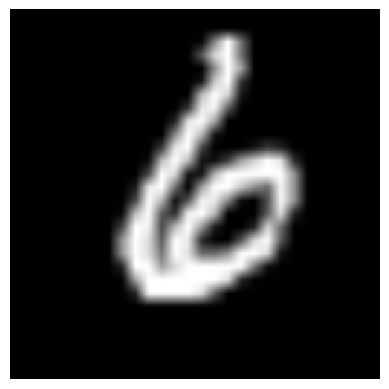

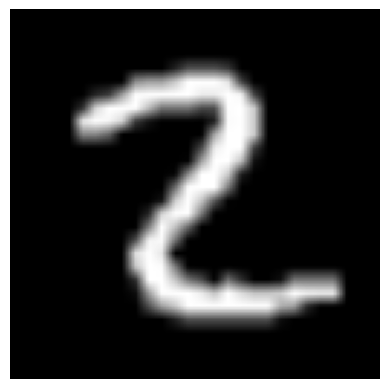

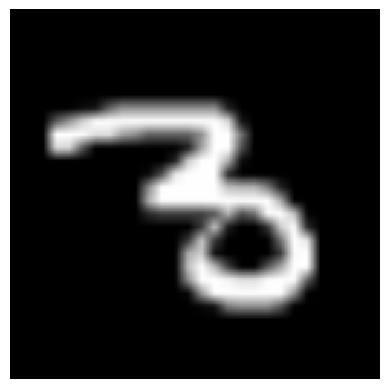

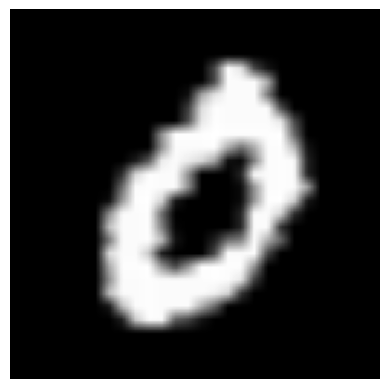

In [25]:
input_images = images.squeeze().detach().cpu().numpy()
output_image = output[0].squeeze().detach().cpu().numpy()

for input_image in input_images:
    # Now, plot the input and output images side by side
    plt.imshow(input_image, cmap='gray')
    plt.axis('off')  # Turn off axis numbers and ticks
    
    plt.show()

In [57]:
encoder.encoder


Sequential(
  (0): Conv2d(1, 128, kernel_size=(25, 25), stride=(2, 2), padding=(12, 12))
  (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (2): Leaky()
  (3): Conv2d(128, 64, kernel_size=(25, 25), stride=(2, 2), padding=(12, 12))
  (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (5): Leaky()
  (6): Conv2d(64, 32, kernel_size=(25, 25), stride=(2, 2), padding=(12, 12))
  (7): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (8): Leaky()
  (9): Conv2d(32, 16, kernel_size=(25, 25), stride=(2, 2), padding=(12, 12))
  (10): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (11): Leaky()
  (12): Flatten(start_dim=1, end_dim=-1)
  (13): Linear(in_features=1024, out_features=1000, bias=True)
  (14): Softmax(dim=None)
)

In [34]:


new_model = torch.nn.Sequential(*(list(encoder.encoder.children())[:-3]))
# new_model
new_model

Sequential(
  (0): Conv2d(1, 128, kernel_size=(25, 25), stride=(2, 2), padding=(12, 12))
  (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (2): Leaky()
  (3): Conv2d(128, 64, kernel_size=(25, 25), stride=(2, 2), padding=(12, 12))
  (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (5): Leaky()
  (6): Conv2d(64, 32, kernel_size=(25, 25), stride=(2, 2), padding=(12, 12))
  (7): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (8): Leaky()
  (9): Conv2d(32, 16, kernel_size=(25, 25), stride=(2, 2), padding=(12, 12))
  (10): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (11): Leaky()
)

In [35]:
new_model(images).shape

torch.Size([4, 16, 8, 8])

(4, 1000)


TypeError: Invalid shape () for image data

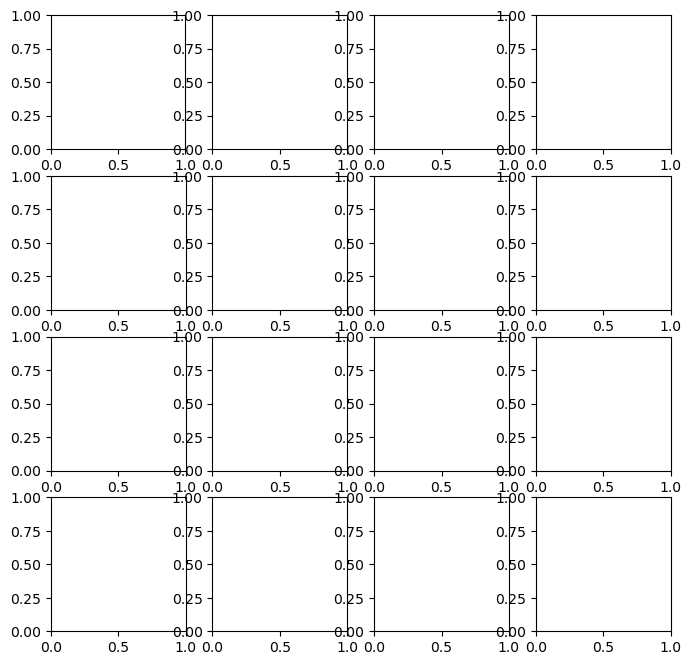

In [10]:
image_np = output.detach().cpu().numpy()

print(image_np.shape)

for image in image_np:
    # Set up a figure with 16 subplots arranged in a 4x4 grid
    fig, axes = plt.subplots(4, 4, figsize=(8, 8))
    
    # Plot each of the 16 channels
    for i, ax in enumerate(axes.flat):
        ax.imshow(image[i], cmap='gray', interpolation='none')  # Display each channel
        ax.set_title(f'Channel {i+1}')
        ax.axis('off')  # Turn off axis
    
    plt.tight_layout()
    plt.show()

(4, 16, 8, 8)


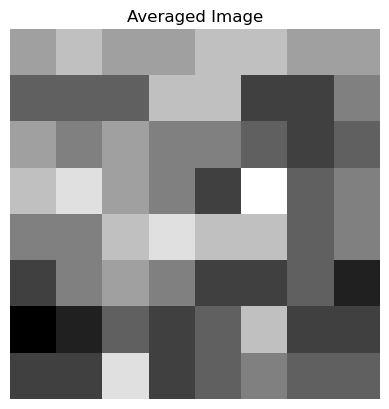

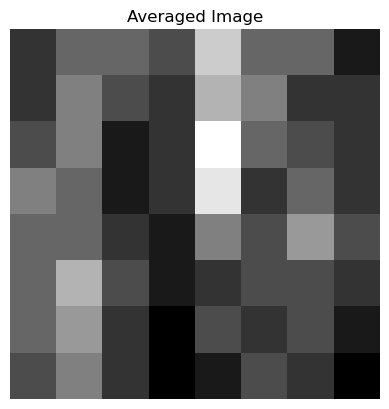

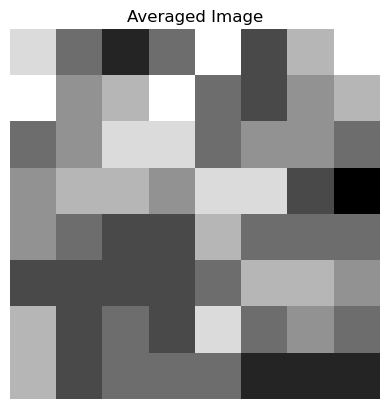

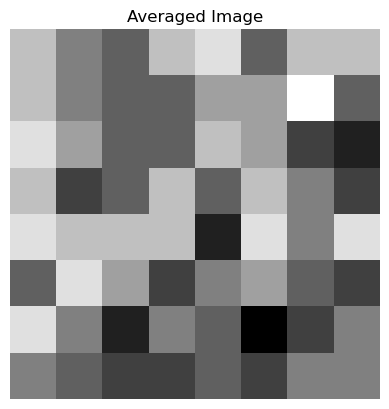

In [44]:
image_np = output.detach().cpu().numpy()

print(image_np.shape)

for image in image_np:
    average_image = image.mean(axis=0)

    # Plot the averaged image
    plt.imshow(average_image, cmap='gray')
    plt.title('Averaged Image')
    plt.axis('off')  # Turn off the axis labels
    plt.show()